# Single Impurity Anderson Model
______________________________


We use the fermionic chain mapping proposed in [1] to perform tensor network simulations of the Single Impurity Anderson Model (SIAM), with Hamiltonian:
\begin{equation}
    \hat H^\text{SIAM}  = \hat H_\text{loc} + \hat H_\text{hyb} + \hat H_\text{cond} = \overbrace{\epsilon_d \hat d^\dagger \hat d}^{\hat H_\text{loc}} + \underbrace{\sum_{k} V_k \Big( \hat d^\dagger \hat c_k + \hat c_k^\dagger \hat d \Big)}_{H_\text{hyb}} + \underbrace{\sum_k \epsilon_k \hat c_k^\dagger \hat c_k}_{H_I^\text{chain}}.
\end{equation}
All of the operators obey to the usual fermionic anti-commutation relations: $\{\hat c_i, \hat c_j^\dagger \} = \delta_{ij}$, $\{\hat c_i, \hat c_j \} =\{\hat c_i^\dagger, \hat c_j^\dagger \} =0$, $\forall i,j$. The chain mapping is based on a thermofield-like transformation [2], performed with fermions: ancillary fermionic operators $\hat c_{2k}$ are defined, one for each of the original fermionic modes $\hat c_{1k}$. A Bogoliubov transformation is then applied, so that two new fermionic modes $\hat f_{1k}$ and $\hat f_{2k}$ are defined as a linear combination of $\hat c_{1k}$ and $\hat c_{2k}$. Two chains are defined: the chain labelled $1$ for the empty modes, the chain labelled $2$ for the filled modes.
The following relations are used to define the functions equivalent to the spectral density of the bosonic case, one for each chain:
\begin{equation}
\begin{split}
   &V_{1k} = V_{k} \sin \theta_k = \sqrt{\frac{1}{e^{\beta \epsilon_k}+1}} \\
   &V_{2k} = V_{k} \cos \theta_k = \sqrt{\frac{1}{e^{-\beta \epsilon_k}+1}}, 
\end{split}
\end{equation}    
where we choose $V_k= \sqrt{1-k^2}$ and $e_k = k$, that is, a linear dispersion relation. This latter choice corresponds to a model of metals (gapless energy spectrum).


The chain Hamiltonian is defined as:
\begin{equation}
    \hat H^\text{chain}  = \hat H_\text{loc} + \sum_{i = \{1,2\}} \bigg[ J_{i,0} \Big( \hat d^\dagger \hat c_k +  \hat d a_k^\dagger \Big) + \sum_{n=1}^\infty  \Big( J_{i,n} \hat a_{i,n}^\dagger \hat a_{i,n-1} +  J_{i,n} \hat  a_{i,n-1}^\dagger \hat a_{i,n} \Big) + \sum_{n=0}^\infty E_{i,n} \hat  a_{i,n}^\dagger \hat a_{i,n} \bigg],
\end{equation}
where the $J_{i,n}$ coefficients are the couplings between the chain sites and the $E_{i,n}$ coefficients are the energies associated to each chain site.

The corresponding MPO representation is:
\begin{equation}
\begin{split}
... &
\begin{bmatrix}
 \hat{\mathbb I} & J_{2,1} \hat a_{2,1}^\dagger & J_{2,1} \hat a_{2,1} & E_{2,1} \hat a_{2,1}^\dagger \hat a_{2,1} 
\end{bmatrix}\cdot
\begin{bmatrix}
 \hat{ \mathbb I} & J_{2,0} \hat a_{2,0}^\dagger & J_{2,0} \hat a_{2,0} & E_{2,0} \hat a_{2,0}^\dagger \hat a_{2,0}\\
0 &0 & 0 & \hat a_{2,0} \\
0 &0 & 0 & \hat a_{2,0}^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot \\ \cdot &
\begin{bmatrix}
 \hat{ \mathbb I} & \hat d^\dagger & \hat d & \epsilon_d \hat d^\dagger \hat d\\
0 &0 & 0 & \hat d \\
0 &0 & 0 & \hat d^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot
\begin{bmatrix}
 \hat{ \mathbb I} & \hat a_{1,0}^\dagger & \hat a_{1,0} & E_{1,0} \hat a_{1,0}^\dagger \hat a_{1,0}\\
0 &0 & 0 & \hat J_{1,0}a_{1,0} \\
0 &0 & 0 & \hat J_{1,0}a_{1,0}^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot
\begin{bmatrix}
 E_{2,1} \hat a_{2,1}^\dagger \hat a_{2,1} \\ J_{2,1} \hat a_{2,1}^\dagger \\ J_{2,1} \hat a_{2,1} \\ \hat{\mathbb I}
\end{bmatrix} ...
\end{split}
\end{equation}

The system starts from a filled state, the chain starts as in the Fermi sea.
________________
### References

[1] Lucas Kohn and Giuseppe E. Santoro. Efficient mapping for anderson impurity problems with matrix product states. Physical Review B, 104(1):014303, Jul 2021. arXiv: [2012.01424](https://arxiv.org/abs/2012.01424).


[2] Ines de Vega and Mari-Carmen Banuls. Thermofield-based chain mapping approach for open quantum systems. Physical Review A, 92(5):052116, Nov 2015. arXiv:[1504.07228](https://arxiv.org/abs/1504.07228).

In [2]:
import h5py
import numpy as np
#import cmath for complex number operations
import cmath
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.style as style 
import matplotlib.pyplot as pl
import scipy.misc
from scipy import ndimage

from scipy.optimize import curve_fit
style.use('tableau-colorblind10')
matplotlib.rcParams.update({'font.size': 12})

In [3]:
path = "/home/berkane/Documents/stage/simulations/"

# path to work from personal computer

# Results for alpha_lit=0.01
res = h5py.File(path+"fermions/results/gbLAh/dat_gbLAh.jld", "r")["data"]
info = open(path+"fermions/results/gbLAh/info.txt", "r")
data = info.read()
print(data)

	 name : Anderson impurity problem
	 machine : local
	 method : DTDVP
	 dt = 0.5
	 tmax = 20.0
	 parameters : N = 20.0, ϵd = -0.4, β = 2.0, 
	 observables : chain1_filled_occup, chain2_empty_occup, system_occup, 
	 convparams : 0.01
	 options : savebonddims = true, verbose = false, 



In [251]:
N = 20
epsd = -0.4
beta = 2.0

times = ["0", "5", "10", "15", "20"]
tim = ["0", "10", "20", "40"]
chain = ["-20", "-10", "0", "10", "20"]

list(res.keys())

['bonddims',
 'chain1_filled_occup',
 'chain2_empty_occup',
 'system_occup',
 'times']

In [252]:
def occupation(res, times, chain):
    f, ax = pl.subplots(figsize=(7,5))
    img = ax.imshow(res.T, cmap='Blues', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')

    y_label_list = times
    x_label_list = chain

    ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])

    ax.set_yticklabels(y_label_list)
    ax.set_xticklabels(x_label_list)

    ax.set_ylabel("$t$")
    ax.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Chain occupation")
    f.colorbar(img)


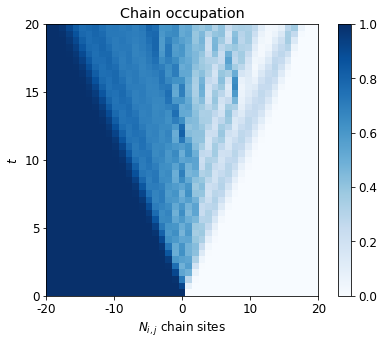

In [253]:
occ = np.column_stack((res["chain1_filled_occup"][()], res["system_occup"][()]))
occ = np.concatenate((occ.T, res["chain2_empty_occup"][()].T))

occupation(occ, times, chain)

In [254]:
def bonddim(res, times, chain):
    f, ax = pl.subplots(figsize=(7,5))
    img = ax.imshow(res, cmap='hot', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')

    y_label_list = times
    x_label_list = chain

    ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])

    ax.set_yticklabels(y_label_list)
    ax.set_xticklabels(x_label_list)

    ax.set_ylabel("$t$")
    ax.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Bond dimensions")
    f.colorbar(img)

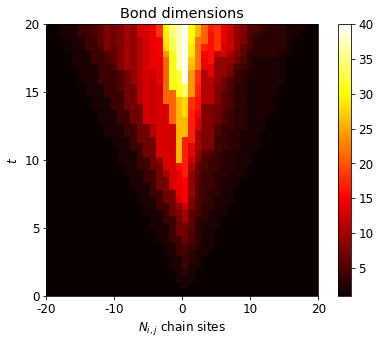

In [255]:
bonddim(res["bonddims"][()], times, chain)

In [262]:
def alltogether(resocc, resbond, times, timespl, chain):
    f = pl.figure(figsize=(13, 9))
    y_label_list = times
    x_label_list = chain
    
    ax1 = pl.subplot(2,2,1)    
    pl.imshow(resocc.T, cmap='Blues', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')
    pl.colorbar()

    ax1.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax1.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax1.set_yticklabels(y_label_list)
    ax1.set_xticklabels(x_label_list)
    ax1.set_ylabel("$t$")
    ax1.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Chain occupation")
    
    ax2 = pl.subplot(2,2,2)
    pl.imshow(resbond, cmap='hot', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')
    pl.colorbar()

    ax2.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax2.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax2.set_yticklabels(y_label_list)
    ax2.set_xticklabels(x_label_list)
    ax2.set_ylabel("$t$")
    ax2.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Bond dimensions")
    
    pl.subplot(2,2,3)    
    sitespos = [i for i in range(1,N+1)]
    sitesneg = [-N+i for i in range(0,N+1)]
    sites = sitesneg + sitespos
    for t in range(1, len(timespl)+1):
        i = int(timespl[t-1])
        pl.plot(sites, resocc.T[i], '-o', markersize="4", label=r"$t =$"+str(timespl[t-1]))
    pl.legend(loc="best",prop={'size': 10})
    pl.xlabel(r"$N_{i,j}$ chain sites")
    pl.ylabel(r'$n_{i,j}$', fontsize=14)
    #pl.title("Occupation evolution")
    
    pl.subplot(2,2,4)    
    sitespos = [i for i in range(1,N+1)]
    sitesneg = [-N+i for i in range(0,N+2)]
    sites = sitesneg + sitespos
    for t in range(1, len(timespl)+1):
        i = int(timespl[t-1])
        x = int(timespl[t-1])*0.5
        pl.plot(sites, resbond[i], '-o', markersize="4", label=r"$t =$"+str(x))
    pl.legend(loc="best",prop={'size': 10})
    pl.xlabel("$N_{i,j}$ chain sites")
    pl.ylabel('$\chi_{i,j}$', fontsize=14)
    #pl.title("Occupation evolution")
    
    pl.show()

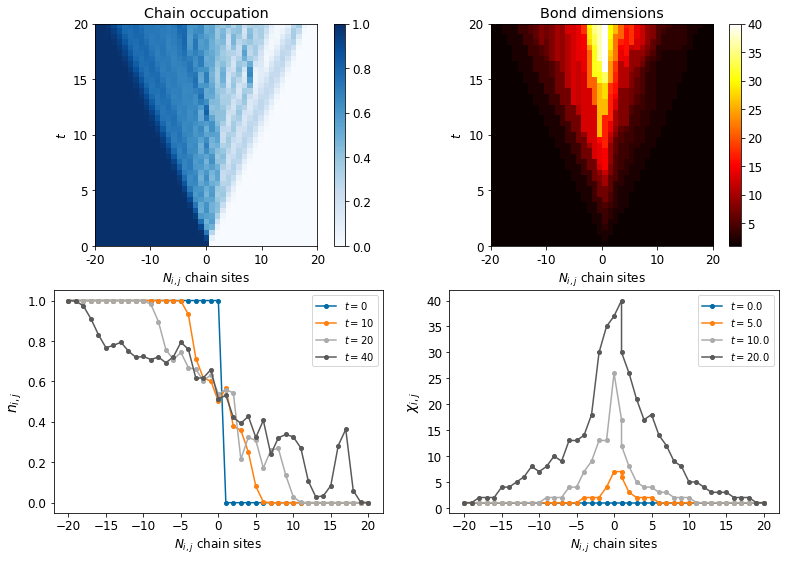

In [263]:
alltogether(occ, res["bonddims"][()], times, tim, chain)